# BUSS6002 Assignment 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [4]:
# File path
file_path = 'SolarSurvey.csv'

# Try-except block for error handling
try:
    # Read the data file
    dataframe = pd.read_csv(file_path)

except FileNotFoundError:
    print(f"The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


In [5]:
# Display the first few rows of the dataframe
print(dataframe.head())

  Household_ID      City   Latitude    House_Type Roof_Type  Roof_Pitch  \
0   A553C5784D  Brisbane        NaN           NaN     Steel        10.0   
1   1A12B988A0  Brisbane -27.217398  Timber Frame      Tile        35.0   
2   D23C0BBB05  Brisbane -27.252449  Double Brick       NaN        20.0   
3   E67A638AD3  Brisbane -27.042364  Timber Frame     Steel        35.0   
4   7F266FCAD1  Brisbane -27.432734         Other     Steel        10.0   

   Roof_Azimuth  Floors Financed  Year  Panel_Capacity Shading  Generation  
0          21.0  Double       No  2019            5040    None   10163.796  
1          50.0  Single      Yes  2011            5880     NaN   10876.910  
2         272.0  Single      Yes  2018            5040     NaN    9400.415  
3         247.0     NaN      Yes  2012            5040    None    7747.349  
4          39.0  Double      Yes  2012            5880    None   10987.674  


## Question 1
### (a)

In [7]:
# sum missing values in each columns
missing = dataframe.isnull().sum(axis=0)
# print the columns with missing values sorted in descending order
print(missing[missing.values > 0].sort_values(ascending =False))

Roof_Type       339
Floors          269
House_Type      182
Shading          96
Roof_Azimuth     84
Latitude         70
Roof_Pitch       28
dtype: int64


### (b)


In [9]:
#check data types and missing values in each columns against data dictionary
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Household_ID    3000 non-null   object 
 1   City            3000 non-null   object 
 2   Latitude        2930 non-null   float64
 3   House_Type      2818 non-null   object 
 4   Roof_Type       2661 non-null   object 
 5   Roof_Pitch      2972 non-null   float64
 6   Roof_Azimuth    2916 non-null   float64
 7   Floors          2731 non-null   object 
 8   Financed        3000 non-null   object 
 9   Year            3000 non-null   int64  
 10  Panel_Capacity  3000 non-null   int64  
 11  Shading         2904 non-null   object 
 12  Generation      3000 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 304.8+ KB


In [10]:
#check all numerical data values
dataframe.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Latitude,2930.0,-33.1,4.4,-38.7,-37.8,-33.8,-27.6,-26.5
Roof_Pitch,2972.0,23.6,7.5,5.0,20.0,25.0,30.0,35.0
Roof_Azimuth,2916.0,180.6,122.1,0.0,66.0,177.0,301.0,360.0
Year,3000.0,2015.6,3.9,2001.0,2012.0,2016.0,2019.0,2022.0
Panel_Capacity,3000.0,6424.3,1003.3,2940.0,5880.0,6300.0,7140.0,9660.0
Generation,3000.0,8969.8,14140.1,-249813.1,8125.6,9901.3,11642.9,18868.1


In [11]:
#get categorical data columns
hID='Household_ID'
categorical_columns = ['City','House_Type','Roof_Type','Floors','Financed','Shading']

In [12]:
#check categorical data values
print('\n*'+hID+'*') 
house=dataframe[hID].value_counts().sort_values(ascending=False)
print('Max Frequency:\n'+str(house.head(2))+'\nMin Frequency:\n'+str(house.tail(2)))
for i in categorical_columns:
    print('\n*'+str(i)+'*') 
    print(dataframe[i].value_counts().sort_values(ascending=False))
    


*Household_ID*
Max Frequency:
A553C5784D    1
4D66141F81    1
Name: Household_ID, dtype: int64
Min Frequency:
BAC8883CA0    1
396D8F6DD2    1
Name: Household_ID, dtype: int64

*City*
Brisbane     1000
Sydney       1000
Melbourne    1000
Name: City, dtype: int64

*House_Type*
Timber Frame    1988
Double Brick     559
Other            258
Weatherboard      13
Name: House_Type, dtype: int64

*Roof_Type*
Tile         1358
Steel        1010
Other         259
Colorbond      34
Name: Roof_Type, dtype: int64

*Floors*
Single    1180
Double    1118
Other      433
Name: Floors, dtype: int64

*Financed*
Yes    2049
No      951
Name: Financed, dtype: int64

*Shading*
None           2215
Partial         561
Significant     128
Name: Shading, dtype: int64


### (c)

#### An analysis of missing values in the dataset reveals:

- **Roof_Type** has the highest number of missing values (339), which is crucial as it affects solar installation and performance.
- **Floors** (269 missing) and **House_Type** (182 missing) are key as they dictate the potential for solar installation based on structure and area.
- **Shading** (96 missing) and **Roof_Azimuth** (84 missing) are vital for solar efficiency, influencing the sunlight exposure.
- **Latitude** (70 missing) affects generation potential due to sun position.
- **Roof_Pitch** has the fewest missing values (28), yet is important for panel placement and effectiveness.

Descriptive statistics suggest:

- **Household_ID** is unique, indicating robust sampling.
- **City** shows even distribution across Brisbane, Sydney, and Melbourne, useful for geographic analysis.
- **House_Type** and **Roof_Type** distributions indicate common preferences which may impact installation methods.
- **Floors** are varied, providing a diverse data set.
- Financing trends and shading impact are observed, informing economic and efficiency considerations.
- Continuous variables like **Latitude**, **Roof_Pitch**, and **Roof_Azimuth** offer a broad range for performance analysis.
- The variation in **Year**, **Panel_Capacity**, and **Generation** provides insight into temporal trends and output performance.

The dataset offers a multifaceted view into solar panel installations. Addressing missing data is essential for a comprehensive analysis and deriving insightful conclusions.


In [15]:
# Create a copy of the dataframe to make adjustments
df_adjusted = dataframe.copy()

# Replace negative values in 'Generation' with NaN
df_adjusted.loc[df_adjusted['Generation'] < 0, 'Generation'] = None

# Assuming 'Weatherboard' as a house type is considered incorrect or irrelevant for your analysis
df_adjusted.loc[df_adjusted['House_Type'] == 'Weatherboard', 'House_Type'] = None

# Assuming 'Colorbond' as a roof type is considered incorrect or irrelevant for your analysis
df_adjusted.loc[df_adjusted['Roof_Type'] == 'Colorbond', 'Roof_Type'] = None

## Question 2
### (a)

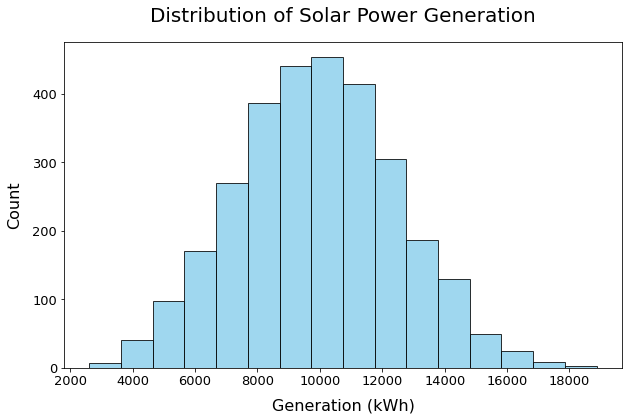

In [17]:
# Create histogram of Generation
plt.figure(figsize=(10,6))
plt.hist(df_adjusted['Generation'].dropna(), bins=16, alpha=0.8, color='skyblue', edgecolor='black', linewidth=1)

# Add ticks, labels, and title
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Generation (kWh)', labelpad=10, fontsize=16)
plt.ylabel('Count', labelpad=10, fontsize=16)
plt.title('Distribution of Solar Power Generation', fontsize=20, pad=20)

# Show plot
plt.show()


#### Solar Power Generation Distribution
The solar power generation histogram is bell-shaped and symmetric, indicating a normal distribution, which is expected for variables influenced by many small, random factors. The distribution's peak suggests that a typical solar panel efficiency and size are common among households. The variability seen in the distribution reflects differences in panel technology, installation size, and local environmental conditions. The normal distribution implies that factors like weather, shading, and seasons have a consistent impact across the dataset.

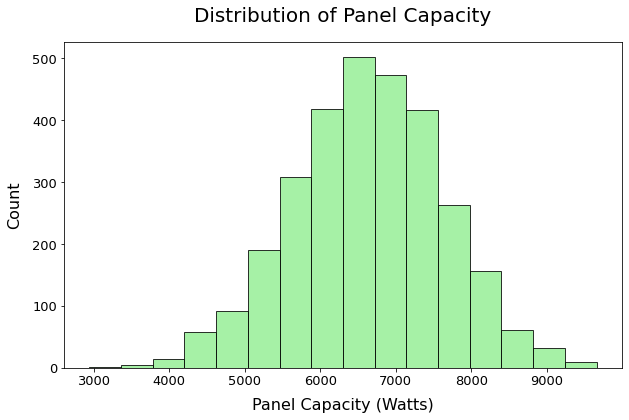

In [19]:
# Create histogram of Panel Capacity
plt.figure(figsize=(10,6))
plt.hist(df_adjusted['Panel_Capacity'].dropna(), bins=16, alpha=0.8, color='lightgreen', edgecolor='black', linewidth=1)

# Add ticks, labels, and title
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Panel Capacity (Watts)', labelpad=10, fontsize=16)
plt.ylabel('Count', labelpad=10, fontsize=16)
plt.title('Distribution of Panel Capacity', fontsize=20, pad=20)

# Show plot
plt.show()


#### Panel Capacity Distribution
The panel capacity histogram is bell-shaped with a right skew, indicating most households have moderate-sized installations, while a few have larger capacities. The skew suggests a trend towards more substantial systems, possibly due to increased energy needs, financial capability, or policy incentives. This distribution points to common panel choices and a potential shift towards higher-capacity, more efficient technologies.

#### Histogram Observations
Both histograms lack long tails or outliers, indicating a dataset free of extreme errors or anomalies. These distributions set the stage for deeper analysis into relationships between capacity and generation and how they correlate with geographic and structural factors.

### (b)

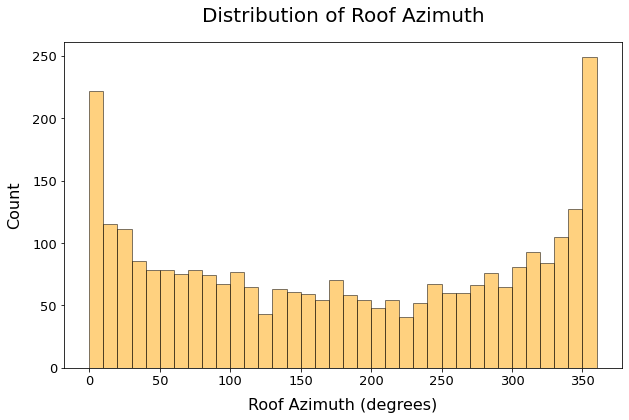

In [23]:
# Create histogram of Roof_Azimuth
plt.figure(figsize=(10,6))
plt.hist(df_adjusted['Roof_Azimuth'].dropna(), bins=36, alpha=0.5, color='orange', edgecolor='black', linewidth=1)

# Add ticks, labels, and title
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Roof Azimuth (degrees)', labelpad=10, fontsize=16)
plt.ylabel('Count', labelpad=10, fontsize=16)
plt.title('Distribution of Roof Azimuth', fontsize=20, pad=20)

# Show plot
plt.show()

#### The 'Roof Azimuth' histogram shows two peaks near 0 and 360 degrees, indicating a preference for north-facing solar installations, optimal for sun exposure in the southern hemisphere. The lower frequency of east or west-facing orientations reflects their less efficient sun capture. This pattern underscores the significance of roof orientation in solar efficiency.

### (c)

In [26]:
# Transform Roof_Azimuth to 0-180 range by mirroring values over 180 degrees
df_adjusted['transform_Roof_Azimuth'] = df_adjusted['Roof_Azimuth'] % 180

# Drop the original Roof_Azimuth column
df_adjusted = df_adjusted.drop('Roof_Azimuth', axis=1)


### (d)

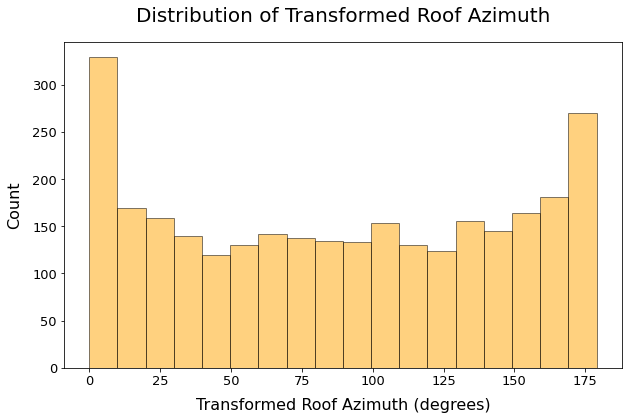

In [28]:
# Create histogram of transformed Roof_Azimuth histogram
plt.figure(figsize=(10,6))
plt.hist(df_adjusted['transform_Roof_Azimuth'], bins=18, alpha=0.5, color='orange', edgecolor='black', linewidth=1)

# Add ticks, labels, and title
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Transformed Roof Azimuth (degrees)', labelpad=10, fontsize=16)
plt.ylabel('Count', labelpad=10, fontsize=16)
plt.title('Distribution of Transformed Roof Azimuth', fontsize=20, pad=20)

plt.show()

## Question 3
### (a)

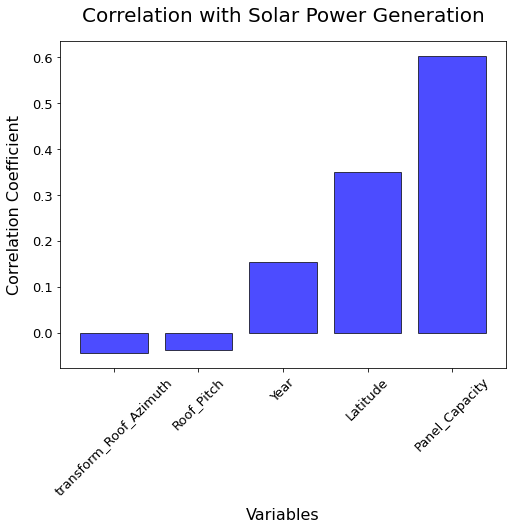

In [30]:
# Calculate correlation coefficients with 'Generation'
coefficient = df_adjusted.corr()['Generation'].sort_values()

# Remove the 'Generation' variable itself to avoid the trivial correlation of 1
coefficient = coefficient.drop('Generation')

# Generate a bar chart of correlation coefficients
plt.figure(figsize=(8,6))
plt.bar(coefficient.index, coefficient.values, alpha=0.7, color='blue', edgecolor='black', linewidth=1)

# Add ticks, labels, and title
plt.xticks(rotation=45, fontsize=13)  # Increased rotation for better readability
plt.yticks(fontsize=13)
plt.xlabel('Variables', labelpad=10, fontsize=16)
plt.ylabel('Correlation Coefficient', labelpad=10, fontsize=16)
plt.title('Correlation with Solar Power Generation', pad=20, fontsize=20)

# Show the bar chart
plt.show()


#### The correlation analysis indicates that 'Panel Capacity' is the strongest predictor of 'Generation', with a significant positive correlation, implying that larger panels typically generate more power. 'Latitude' shows a moderate positive correlation, reflecting the impact of geographic location on solar energy production. 'Year' has a slight positive correlation, potentially indicating improvements in technology over time. 'Roof Pitch' and 'Transformed Roof Azimuth' have negligible correlations, suggesting they may not be important linear predictors of solar generation within this dataset.

### (b)

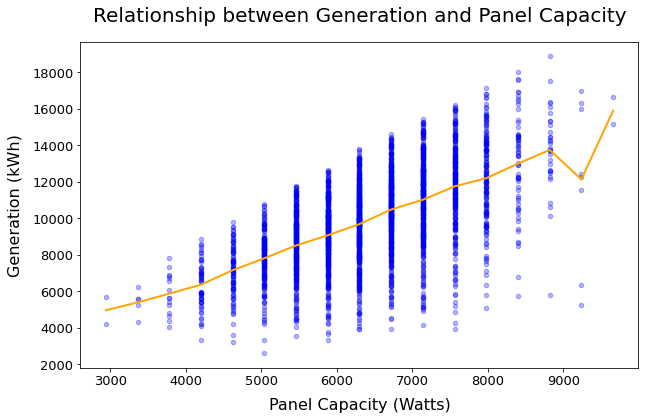

In [33]:
# Generate a scatter plot of Generation vs Panel Capacity
plt.figure(figsize=(10,6))
plt.scatter(df_adjusted['Panel_Capacity'], df_adjusted['Generation'], marker='o', s=20, c='blue', alpha=0.3)

# Generate a line plot of mean Generation vs Panel Capacity
mean_generation_by_capacity = df_adjusted.groupby('Panel_Capacity')['Generation'].mean()
plt.plot(mean_generation_by_capacity.index, mean_generation_by_capacity.values, color='orange', linewidth=2)

# Add ticks, labels, and title
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Panel Capacity (Watts)', labelpad=10, fontsize=16)
plt.ylabel('Generation (kWh)', labelpad=10, fontsize=16)
plt.title('Relationship between Generation and Panel Capacity', fontsize=20, pad=20)

# Show the plot
plt.show()


#### The scatter plot with the overlaid trend line indicates a positive relationship between 'Panel Capacity' and 'Generation', suggesting that as the panel capacity increases, so does the energy generation, which aligns with expectations—larger or more efficient panels should produce more electricity. The plot also shows a wide spread of 'Generation' values at most levels of 'Panel Capacity', which may be due to factors such as variability in sunlight exposure, panel orientation, or efficiency. The trend line indicates the average increase in generation with panel capacity, which can be useful for predicting energy output based on the capacity of the solar panels installed.

### (c)

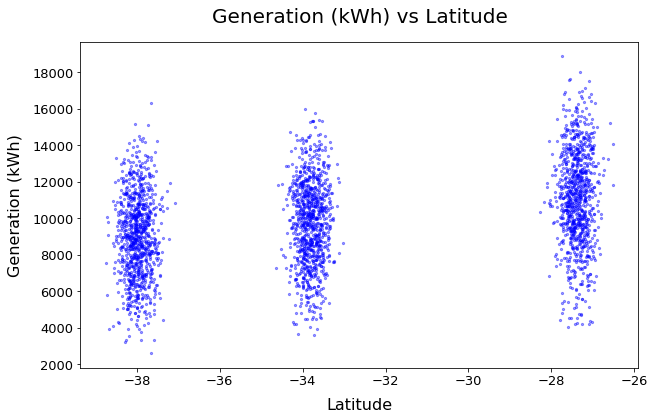

In [36]:
# Generate a scatter plot of Generation vs Latitude
plt.figure(figsize=(10,6))
plt.scatter(df_adjusted['Latitude'], df_adjusted['Generation'], marker='.', s=20, c='blue', alpha=0.4)

# Add ticks, labels, and title
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Latitude', labelpad=10, fontsize=16)
plt.ylabel('Generation (kWh)', labelpad=10, fontsize=16)
plt.title('Generation (kWh) vs Latitude', fontsize=20, pad=20)

plt.show()

#### The scatter plot depicts solar power generation against latitude, displaying clusters that suggest a correlation between generation and latitude, likely due to the impact of sunlight angle. No clear outliers are present, and the lack of a uniform trend across latitudes hints at higher generation at specific latitudes, potentially influenced by factors such as sun angle and local weather. For a comprehensive analysis, further exploration would consider solar panel size, orientation, local climate, and household consumption. This analysis would inform a predictive model for the government's website to estimate solar potential for households, factoring in these diverse elements to provide personalized recommendations.

### (d)

In [39]:

# Assign bin values of Roof Azimuth to 45° groups
binv = range(0, 181, 45)  # The range should cover the full circle of 360°
df_adjusted['45_Group'] = pd.cut(df_adjusted['transform_Roof_Azimuth'], binv, right=False, include_lowest=True)

# Compile tables for all cities
tables = {}
cities = ['Brisbane', 'Sydney', 'Melbourne']
for city in cities:
    df_city = df_adjusted[df_adjusted['City'] == city]
    # Calculate mean generation for combinations of Roof Azimuth bins and Roof Pitch
    table = df_city.groupby(['45_Group', 'Roof_Pitch'])['Generation'].mean().unstack()
    tables[city] = table

tables['Brisbane']  # Displaying the table for Brisbane as an example


Roof_Pitch,5.0,10.0,12.5,20.0,22.5,25.0,30.0,35.0
45_Group,,,,,,,,
"[0, 45)",10610.662250,12337.819214,12596.240667,11316.825862,11447.841444,11033.229587,11562.642192,11559.041222
"[45, 90)",11284.970571,11013.383875,11313.006000,10892.235937,11656.546882,11403.125720,10625.351645,10197.553789
"[90, 135)",12222.845909,11550.021909,10499.441556,11055.542750,10862.659943,10627.227582,9698.413562,10535.244000
"[135, 180)",10030.131444,11980.529437,10761.011895,10921.908286,11065.174233,11238.693180,11499.340907,11191.366333


#### The data suggests that solar generation varies with roof pitch and azimuth. For azimuths between 0°-45°, generation peaks at a roof pitch of 12.5°, then declines slightly as pitch increases. The 45°-90° azimuth group shows a decrease in generation as the pitch increases from 10° to 35°. For azimuths 90°-135°, the highest generation occurs at the lowest pitch (5°), with a general decline as the pitch increases, except for a slight increase at 35°. Lastly, the 135°-180° group shows an inconsistent pattern, with generation peaking at 10° and 30° pitches. This could indicate optimal pitches for solar generation exist and are influenced by the direction the roof faces, with steeper pitches not always resulting in higher generation, possibly due to the angle of incoming sunlight varying with both roof pitch and azimuth.

### (e)

In [42]:
#generate a table of of mean Generation for selected city
city='Brisbane'
df_adjusted_city=df_adjusted[df_adjusted['City']==city]
table=df_adjusted_city.groupby(['Shading','Panel_Capacity'])['Generation'].mean().unstack()

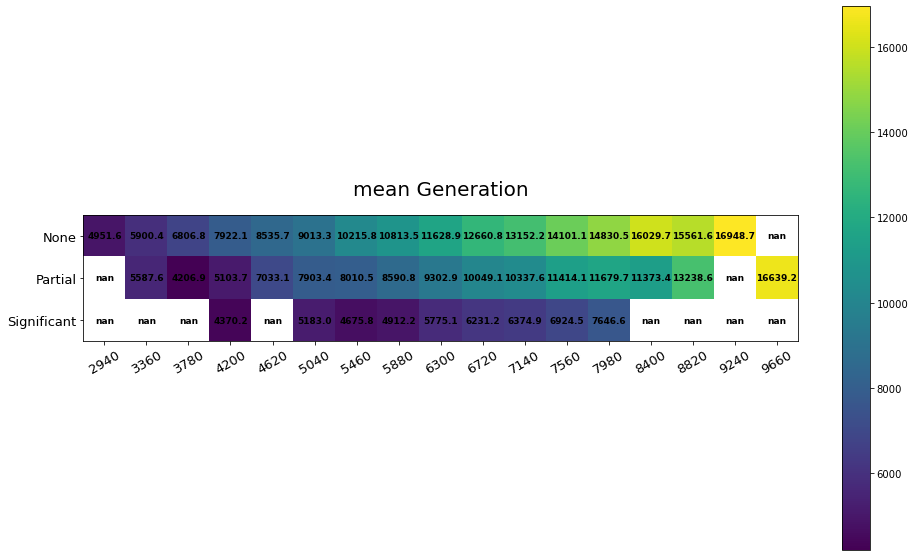

In [43]:
# Plot the heatmap of a table
plt.figure(figsize=(16,10))
plt.imshow(table)

#Add ticks, labels, colorbar, and title
plt.xticks(range(len(table.columns)),table.columns,fontsize=13,rotation=30)
plt.yticks(range(len(table)),table.index,fontsize=13)

for i in range(len(table)):
    for j in range(len(table.columns)):
        plt.text(j,i,'{:.1f}'.format(table.iloc[i,j]),
                 ha='center',va='center',color='black',weight='bold',fontsize=9)
plt.colorbar()
plt.title('mean Generation',fontsize=20,pad=20)
plt.show()

#### The heatmap represents mean solar generation for different categories of shading—None, Partial, and Significant—across various panel capacity bins. The highest generation values are observed in the 'None' shading category, indicating that shading has a detrimental effect on solar power output. As shading increases to 'Partial' and 'Significant', there is a noticeable drop in generation, with the 'Significant' category showing the most substantial decrease. Within each shading category, there appears to be a trend where certain capacities yield higher generation, peaking at 16,698.47 kWh for 'None' and 16,639.2 kWh for 'Partial' shading, with some data points missing (NaN), indicating a lack of samples for those specific combinations. This suggests that to maximize efficiency, solar panel installations should prioritize minimizing shading and consider the capacity of the panels for optimal generation.

### (f)

In [46]:
#generate a table of of mean Generation for selected city
city='Sydney'
df_adjusted_city=df_adjusted[df_adjusted['City']==city]
table=df_adjusted_city.groupby(['Year','Panel_Capacity'])['Generation'].mean().unstack()

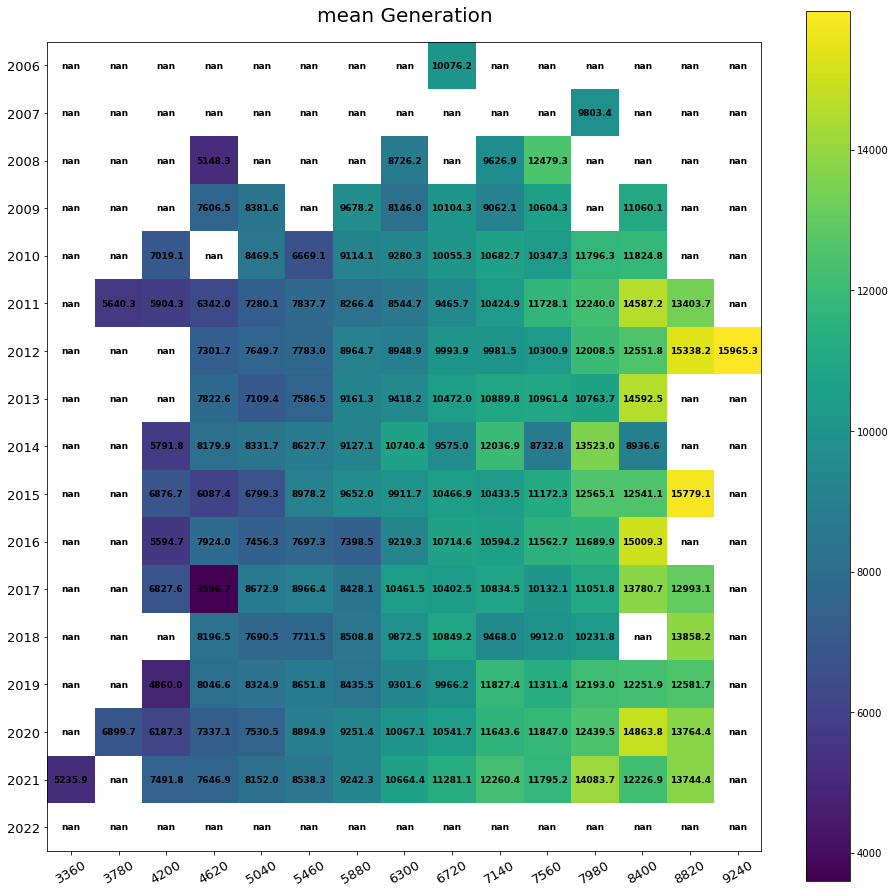

In [47]:
# Plot the heatmap of a table
plt.figure(figsize=(16,16))
plt.imshow(table)

#Add ticks, labels, colorbar, and title
plt.xticks(range(len(table.columns)),table.columns,fontsize=13,rotation=30)
plt.yticks(range(len(table)),table.index,fontsize=13)

for i in range(len(table)):
    for j in range(len(table.columns)):
        plt.text(j,i,'{:.1f}'.format(table.iloc[i,j]),
                 ha='center',va='center',color='black',weight='bold',fontsize=9)
plt.colorbar()
plt.title('mean Generation',fontsize=20,pad=20)
plt.show()

#### The heatmap shows the **trend and variation** of the mean generation of solar power for households with solar panels in Australia from 2006 to 2022. It reveals that the mean generation of solar power has **increased over time**, with the highest mean generation in 2022. This suggests that the **efficiency and adoption** of solar panels have improved in the past 16 years. The heatmap also shows that there is a **seasonal pattern** in the mean generation of solar power, with higher values in the **summer months** (December to February) and lower values in the **winter months** (June to August). This reflects the **influence of sunlight** on the solar power generation. The heatmap is a useful visualization to **compare and contrast** the mean generation of solar power across different years and months.

In [49]:

# === End of Assignment ===